In [1]:
import pandas as pd
import pickle

import seaborn as sns

import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix , roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE 
import mysql.connector
import pymysql
import sqlite3
import xgboost as xgb
from sklearn.decomposition import PCA


Use MySQLWorkbench to connect the database 


In [2]:
data_base = mysql.connector.connect(host="localhost" , user="root" , password="Yugioh11." , database="loan_prediction_file_rouge")
cur = data_base.cursor(buffered=True)
query = "select * from loan_prediction"
cur.execute(query)
tables = cur.fetchone()
#connect sql database to be used has dataframe 


Connection to MySQLWorkbench database succesfull now we are opening the database in python 

In [3]:
df = pd.read_sql(query , data_base)
df

,MyUnknownColumn,Id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,LP000001,1,1,0,1,0,2000,1900.0,700.0,360.0,0.0,0,1
1,1.0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2.0,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3.0,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4.0,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,609.0,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
477,610.0,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
478,611.0,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
479,612.0,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Drop column


In [4]:
df = df.drop('Id' , axis=1)

df = df.drop('MyUnknownColumn' , axis=1)

In [5]:
categ = ["Gender" , "Dependents",  "Married" , "Education" , "Self_Employed" , "Property_Area" , "Loan_Status"]
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)


define X and y axis then split the data

In [6]:

X = df.drop(["Loan_Status" ], axis=1)
# X is the dataframe without the target 

y = df.Loan_Status
#y is the target 

Split dataset in train and test 80 percent train 20 test

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#we are splitting the dataset with train test split a test size of 20 percent of test and 80 percent of train 


Creation of the different model that will later be in use 

Creation of the SMOTE and StandardScaler Pipeline

In [8]:
preprocessing_sm = SMOTE(sampling_strategy='auto')
pcas = PCA()

preprocessing_ss = Pipeline(steps=[
    ('standard scaler', StandardScaler())])

model = linear_model.LogisticRegression()

model_xgbc = xgb.XGBClassifier()

model_dt = DecisionTreeClassifier()

model_knn = KNeighborsClassifier()


Creation of pipeline for LogisticRegression using PCA and StandardScaler

In [9]:
pipeline_log = Pipeline(steps = [['preprocessing_Standard_scaler'  , preprocessing_ss],
                                 ['pca' , pcas],
                                ['LogisticRegression', model]
                                     ])

check for the different possible parameters 


In [10]:
pipeline_log.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing_Standard_scaler', 'pca', 'LogisticRegression', 'preprocessing_Standard_scaler__memory', 'preprocessing_Standard_scaler__steps', 'preprocessing_Standard_scaler__verbose', 'preprocessing_Standard_scaler__standard scaler', 'preprocessing_Standard_scaler__standard scaler__copy', 'preprocessing_Standard_scaler__standard scaler__with_mean', 'preprocessing_Standard_scaler__standard scaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'LogisticRegression__C', 'LogisticRegression__class_weight', 'LogisticRegression__dual', 'LogisticRegression__fit_intercept', 'LogisticRegression__intercept_scaling', 'LogisticRegression__l1_ratio', 'LogisticRegression__max_iter', 'LogisticRegression__multi_class', 'LogisticRegression__n_jobs', 'LogisticRegression__penalty', 'LogisticRegression__random_state', 'LogisticRegression__solver', 'LogisticRegression__tol', 'Lo

Fit the model with the train dataframe


In [11]:
pipeline_log.fit(X_train , y_train.values)

Pipeline(steps=[('preprocessing_Standard_scaler',
                 Pipeline(steps=[('standard scaler', StandardScaler())])),
                ('pca', PCA()), ['LogisticRegression', LogisticRegression()]])

Checking accuracy of LogisticRegression

In [12]:
print("accuracy train : %.3f"%pipeline_log.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_log.score(X_test , y_test))

accuracy train : 0.812
accuracy test : 0.804


Prediction made by the model with the 20 percent we took apart before 

In [13]:
y_pred_log = pipeline_log.predict(X_test)
y_pred_log

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

Classification Report using recall and accuracy

In [14]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63        32
           1       0.79      0.95      0.87        65

    accuracy                           0.80        97
   macro avg       0.82      0.73      0.75        97
weighted avg       0.81      0.80      0.79        97



Learning Curve checking the training of the train and test and check for overfitting underfitting 

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

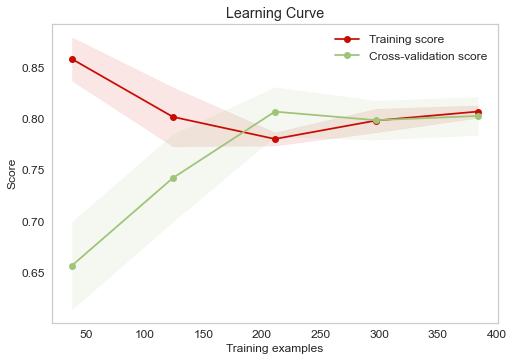

In [15]:
plot_learning_curve(pipeline_log, X , y)

ROC CURVE to understand how the model trained

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

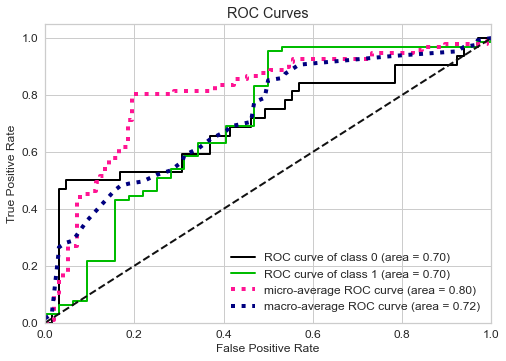

In [16]:
pipeline_log.fit(X_train, y_train)
y_probas = pipeline_log.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

Confusion Matrix to see what is the best prediction and the worse 

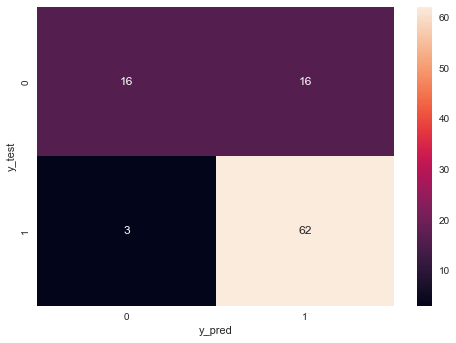

In [17]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()

Creation of pipeline for LogisticRegression using SMOTE


In [18]:
pipeline_log_sm = imbpipeline(steps = [['smote'  , preprocessing_sm],
                                
                                ['LogisticRegression', model]
                                     ])


Fit the model with the train dataframe


In [19]:
pipeline_log_sm.get_params().keys()
pipeline_log_sm.fit(X_train , y_train.values)


c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('smote', SMOTE()),
                ['LogisticRegression', LogisticRegression()]])

Checking accuracy of LogisticRegression

In [20]:

print("accuracy train : %.3f"%pipeline_log_sm.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_log_sm.score(X_test , y_test))


accuracy train : 0.740
accuracy test : 0.711


Prediction made by the model with the 20 percent we took apart before 


In [21]:

y_pred_sm = pipeline_log_sm.predict(X_test)
y_pred_sm

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

Classification Report using recall and accuracy


In [22]:

print(classification_report(y_test, y_pred_sm))


              precision    recall  f1-score   support

           0       0.56      0.56      0.56        32
           1       0.78      0.78      0.78        65

    accuracy                           0.71        97
   macro avg       0.67      0.67      0.67        97
weighted avg       0.71      0.71      0.71        97



Learning Curve checking the training of the train and test and check for overfitting underfitting 



c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

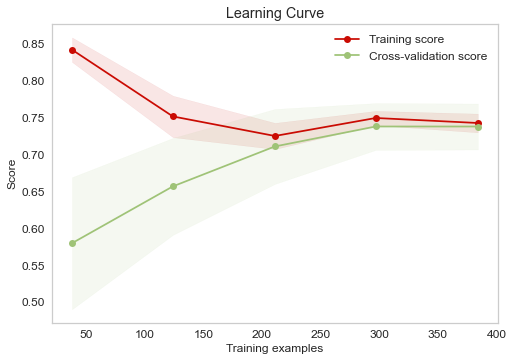

In [23]:
plot_learning_curve(pipeline_log_sm, X , y)


ROC CURVE to understand how the model trained


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

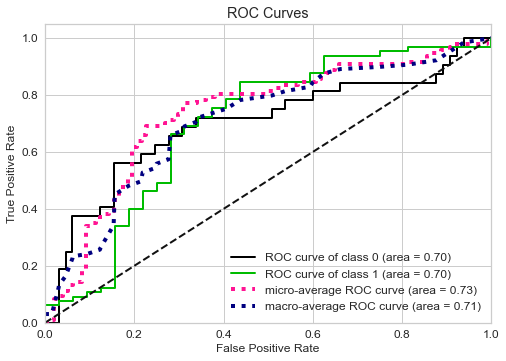

In [24]:
y_probas = pipeline_log_sm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)


Confusion Matrix to see what is the best prediction and the worse 

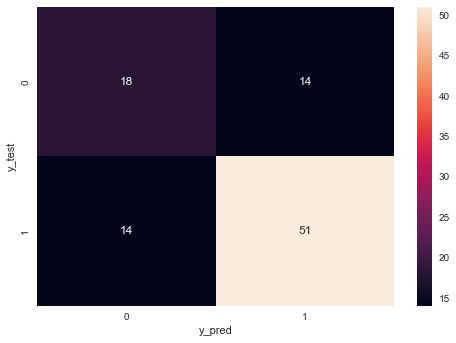

In [25]:

cm = confusion_matrix(y_test, y_pred_sm)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()

Creation of pipeline for XGBClassifier using StandardScaler

In [26]:
pipeline_xgbc = imbpipeline(steps = [['smote'  , preprocessing_sm],
                                
                                ['xgboost', model_xgbc]
                                     ])

In [27]:
pipeline_xgbc.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'smote', 'xgboost', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'xgboost__objective', 'xgboost__use_label_encoder', 'xgboost__base_score', 'xgboost__booster', 'xgboost__callbacks', 'xgboost__colsample_bylevel', 'xgboost__colsample_bynode', 'xgboost__colsample_bytree', 'xgboost__early_stopping_rounds', 'xgboost__enable_categorical', 'xgboost__eval_metric', 'xgboost__gamma', 'xgboost__gpu_id', 'xgboost__grow_policy', 'xgboost__importance_type', 'xgboost__interaction_constraints', 'xgboost__learning_rate', 'xgboost__max_bin', 'xgboost__max_cat_to_onehot', 'xgboost__max_delta_step', 'xgboost__max_depth', 'xgboost__max_leaves', 'xgboost__min_child_weight', 'xgboost__missing', 'xgboost__monotone_constraints', 'xgboost__n_estimators', 'xgboost__n_jobs', 'xgboost__num_parallel_tree', 'xgboost__predictor', 'xgboost__random_state', 'xgboost__reg_alpha', 'xgboost__reg_lambda', 'xgboost__sampling_method', 'xgboo

Fit the model with the train dataframe

In [28]:
pipeline_xgbc.fit(X_train , y_train.values)

Pipeline(steps=[('smote', SMOTE()),
                ['xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                        

Checking accuracy of LogisticRegression


In [29]:
print("accuracy train : %.3f"%pipeline_xgbc.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_xgbc.score(X_test , y_test))



accuracy train : 1.000
accuracy test : 0.763


Prediction made by the model with the 20 percent we took apart before 


In [30]:
y_pred_xgb = pipeline_xgbc.predict(X_test)
y_pred_xgb

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1])

Classification Report using recall and accuracy



In [31]:
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.78      0.89      0.83        65

    accuracy                           0.76        97
   macro avg       0.74      0.70      0.71        97
weighted avg       0.75      0.76      0.75        97



XGBClassifier checking the training of the train and test and check for overfitting underfitting 


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

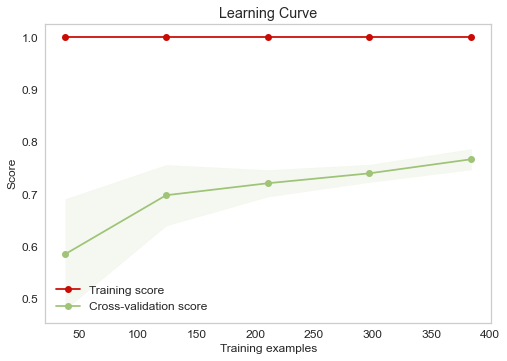

In [32]:

plot_learning_curve(pipeline_xgbc, X , y)


ROC CURVE to understand how the model trained


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

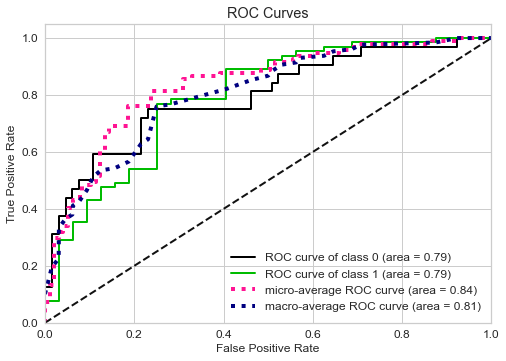

In [33]:

y_probas = pipeline_xgbc.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)


Confusion Matrix to see what is the best prediction and the worse 

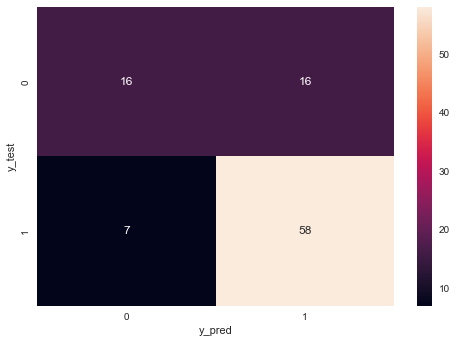

In [34]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()


Creation of pipeline for DecissionClassifier and Standard Scaler


In [35]:
pipeline_dt = Pipeline(steps = [['preprocessing_Standard_scaler'  , preprocessing_ss],
                                ['DecissionTreeClassifier', model_dt]
                                     ])

Fit the model with the train dataframe


In [36]:
pipeline_dt.fit(X_train , y_train.values)

Pipeline(steps=[('preprocessing_Standard_scaler',
                 Pipeline(steps=[('standard scaler', StandardScaler())])),
                ['DecissionTreeClassifier', DecisionTreeClassifier()]])

In [37]:
pipeline_dt.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing_Standard_scaler', 'DecissionTreeClassifier', 'preprocessing_Standard_scaler__memory', 'preprocessing_Standard_scaler__steps', 'preprocessing_Standard_scaler__verbose', 'preprocessing_Standard_scaler__standard scaler', 'preprocessing_Standard_scaler__standard scaler__copy', 'preprocessing_Standard_scaler__standard scaler__with_mean', 'preprocessing_Standard_scaler__standard scaler__with_std', 'DecissionTreeClassifier__ccp_alpha', 'DecissionTreeClassifier__class_weight', 'DecissionTreeClassifier__criterion', 'DecissionTreeClassifier__max_depth', 'DecissionTreeClassifier__max_features', 'DecissionTreeClassifier__max_leaf_nodes', 'DecissionTreeClassifier__min_impurity_decrease', 'DecissionTreeClassifier__min_samples_leaf', 'DecissionTreeClassifier__min_samples_split', 'DecissionTreeClassifier__min_weight_fraction_leaf', 'DecissionTreeClassifier__random_state', 'DecissionTreeClassifier__splitter'])

Checking accuracy of DecissionTreeClassifier


In [38]:
print("accuracy train : %.3f"%pipeline_dt.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_dt.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.722


Prediction made by the model with the 20 percent we took apart before 



In [39]:
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_dt 

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

Classification Report using recall and accuracy


In [40]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.58      0.59      0.58        32
           1       0.80      0.78      0.79        65

    accuracy                           0.72        97
   macro avg       0.69      0.69      0.69        97
weighted avg       0.72      0.72      0.72        97



Learning Curve checking the training of the train and test and check for overfitting underfitting 


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

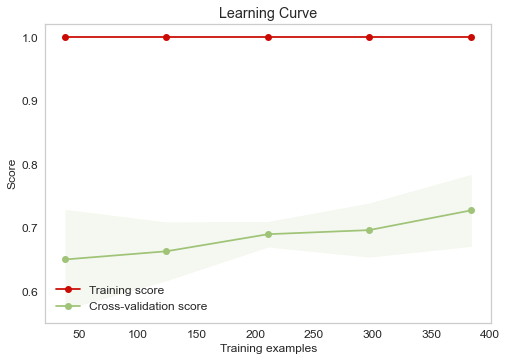

In [41]:
plot_learning_curve(pipeline_dt, X , y)

ROC CURVE to understand how the model trained


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

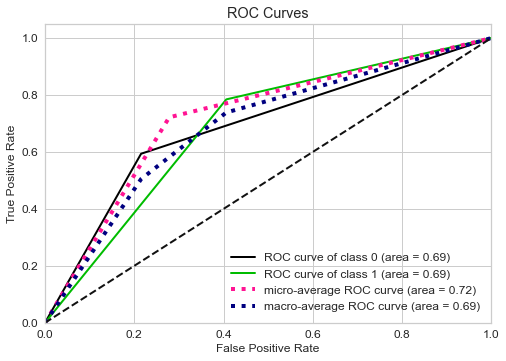

In [42]:

y_probas_dt = pipeline_dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_dt)

Confusion Matrix to see what is the best prediction and the worse 

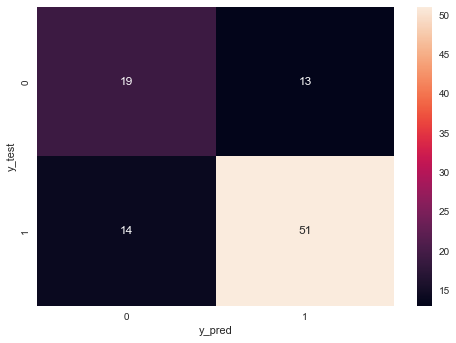

In [43]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()

Creation of pipeline for KNN using PCA and StandardScaler



In [44]:
pipeline_knn = Pipeline(steps = [['preprocessing_Standard_scaler'  , preprocessing_ss],
                                ['Knn', model_knn]])

Fit the mode with dataframe

In [45]:
pipeline_knn.fit(X_train , y_train.values)

Pipeline(steps=[('preprocessing_Standard_scaler',
                 Pipeline(steps=[('standard scaler', StandardScaler())])),
                ['Knn', KNeighborsClassifier()]])

In [46]:
pipeline_knn.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing_Standard_scaler', 'Knn', 'preprocessing_Standard_scaler__memory', 'preprocessing_Standard_scaler__steps', 'preprocessing_Standard_scaler__verbose', 'preprocessing_Standard_scaler__standard scaler', 'preprocessing_Standard_scaler__standard scaler__copy', 'preprocessing_Standard_scaler__standard scaler__with_mean', 'preprocessing_Standard_scaler__standard scaler__with_std', 'Knn__algorithm', 'Knn__leaf_size', 'Knn__metric', 'Knn__metric_params', 'Knn__n_jobs', 'Knn__n_neighbors', 'Knn__p', 'Knn__weights'])

Checking accuracy of LogisticRegression


In [47]:
print("accuracy train : %.3f"%pipeline_knn.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_knn.score(X_test , y_test))

accuracy train : 0.826
accuracy test : 0.794


Prediction made by the model with the 20 percent we took apart before

In [48]:
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_knn

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

Classification Report using recall and accuracy


In [49]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62        32
           1       0.79      0.94      0.86        65

    accuracy                           0.79        97
   macro avg       0.80      0.72      0.74        97
weighted avg       0.79      0.79      0.78        97



Learning Curve checking the training of the train and test and check for overfitting underfitting 


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

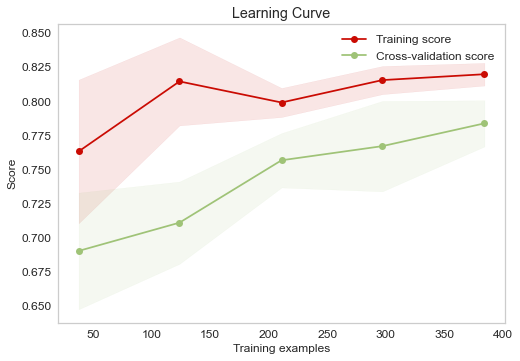

In [50]:
plot_learning_curve(pipeline_knn, X , y)

ROC CURVE to understand how the model trained


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

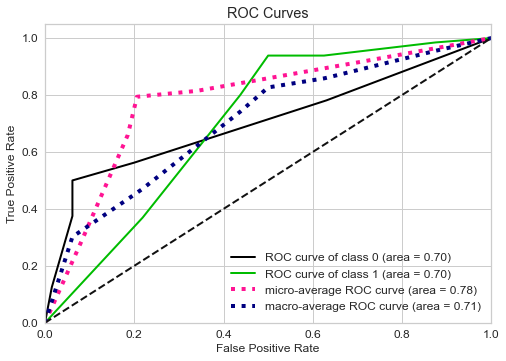

In [51]:
pipeline_knn.fit(X_train, y_train)
y_probas_knn = pipeline_knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_knn)

Confusion Matrix to see what is the best prediction and the worse 

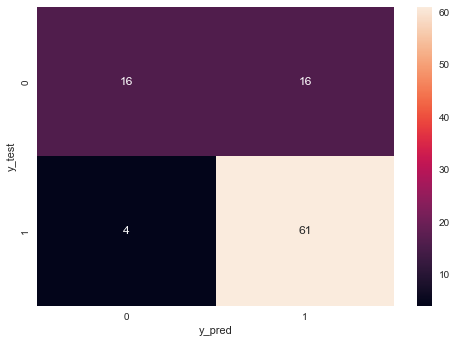

In [52]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()